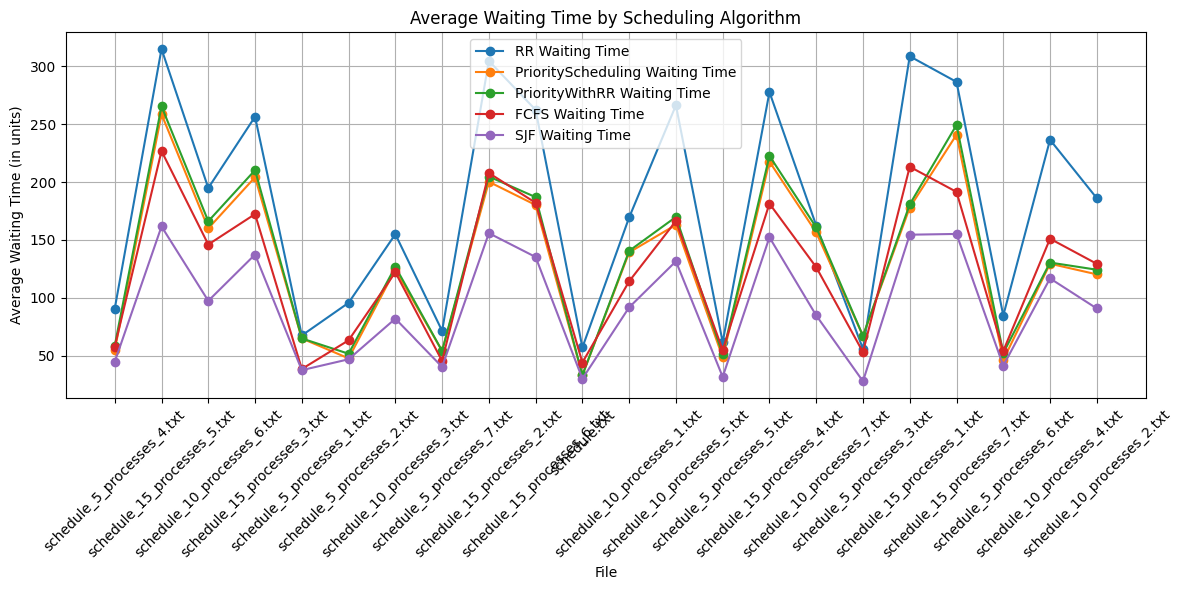

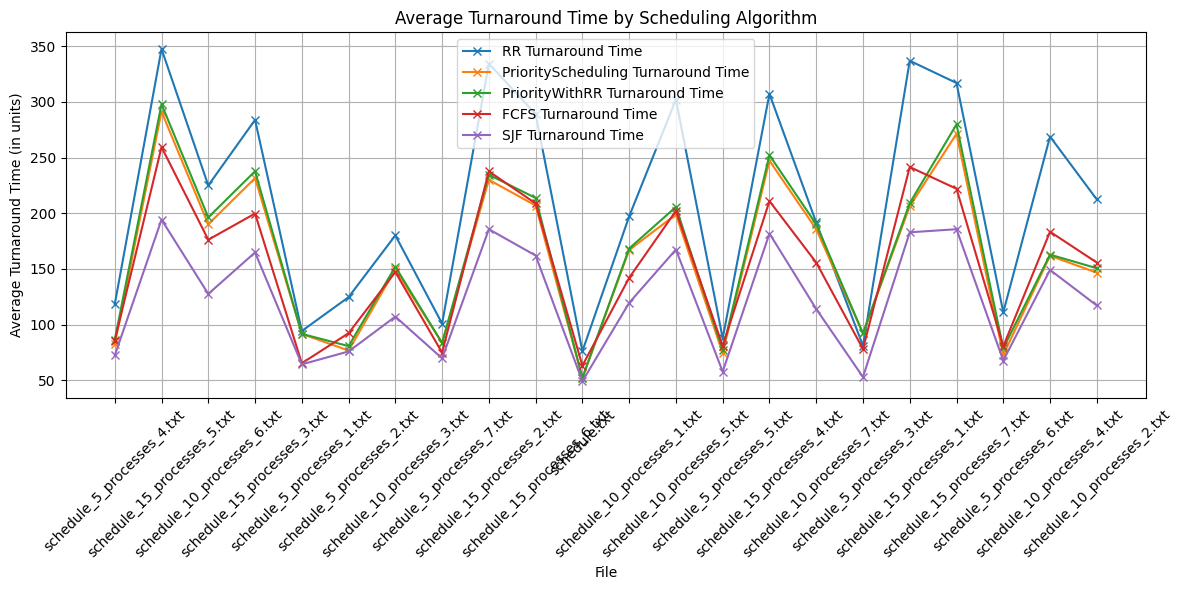

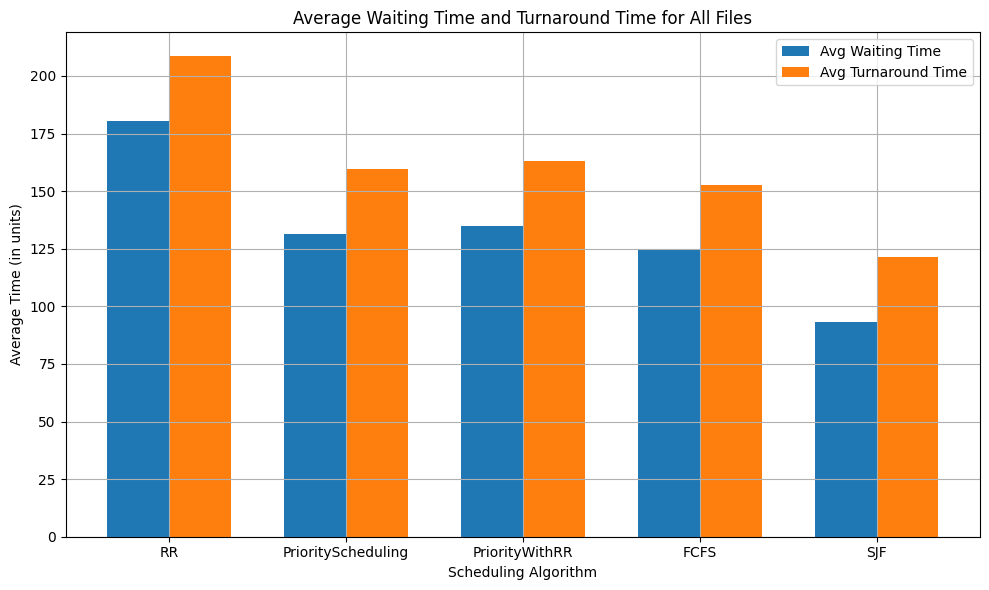

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Function to read data from the text file
def read_data_from_file(filename):
    data = {}
    current_file = None

    with open(filename, 'r') as file:
        for line in file:
            line = line.strip()
            if line.startswith("Results for:"):
                current_file = line.split(":")[1].strip()
                data[current_file] = {}
            elif line.startswith("Algorithm:"):
                alg = line.split(":")[1].strip()
                waiting_time = next(file).strip().split(":")[1].strip()
                turnaround_time = next(file).strip().split(":")[1].strip()
                data[current_file][alg] = {
                    "avg_waiting": float(waiting_time),
                    "avg_turnaround": float(turnaround_time),
                }
    return data

# Read the data from 'all_results.txt'
data = read_data_from_file('all_results.txt')

# Prepare the data for plotting
algorithms = list(data[next(iter(data))].keys())  # Get algorithms from the first file
files = list(data.keys())

avg_waiting_times = {alg: [] for alg in algorithms}
avg_turnaround_times = {alg: [] for alg in algorithms}

for file in files:
    for alg in algorithms:
        avg_waiting_times[alg].append(data[file][alg]["avg_waiting"])
        avg_turnaround_times[alg].append(data[file][alg]["avg_turnaround"])

# Convert to DataFrame for easier manipulation
df_waiting = pd.DataFrame(avg_waiting_times, index=files)
df_turnaround = pd.DataFrame(avg_turnaround_times, index=files)

# 1st Visualization: Average Waiting Time
plt.figure(figsize=(12, 6))
for alg in algorithms:
    plt.plot(df_waiting.index, df_waiting[alg], marker='o', label=f'{alg} Waiting Time')

plt.title('Average Waiting Time by Scheduling Algorithm')
plt.xlabel('File')
plt.ylabel('Average Waiting Time (in units)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('avg_waiting_time.png')
plt.show()

# 1st Visualization: Average Turnaround Time
plt.figure(figsize=(12, 6))
for alg in algorithms:
    plt.plot(df_turnaround.index, df_turnaround[alg], marker='x', label=f'{alg} Turnaround Time')

plt.title('Average Turnaround Time by Scheduling Algorithm')
plt.xlabel('File')
plt.ylabel('Average Turnaround Time (in units)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('avg_turnaround_time.png')
plt.show()

# 2nd Visualization: Average of all files for individual algorithms
avg_waiting_overall = df_waiting.mean()
avg_turnaround_overall = df_turnaround.mean()

x = np.arange(len(algorithms))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, avg_waiting_overall, width, label='Avg Waiting Time')
plt.bar(x + width/2, avg_turnaround_overall, width, label='Avg Turnaround Time')

plt.title('Average Waiting Time and Turnaround Time for All Files')
plt.xlabel('Scheduling Algorithm')
plt.ylabel('Average Time (in units)')
plt.xticks(x, algorithms)
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('avg_wait_turnaround_overall.png')
plt.show()
